In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score

In [34]:
df = pd.read_csv('loan_approval_dataset.csv')

In [35]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## EDA

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [37]:
df.shape

(4269, 13)

In [38]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [39]:
df[' education'].value_counts()

 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [40]:
df[' loan_status'].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [41]:
df[' loan_status'].value_counts(normalize=True)* 100

 loan_status
Approved    62.215976
Rejected    37.784024
Name: proportion, dtype: float64

<Axes: xlabel=' loan_status', ylabel='count'>

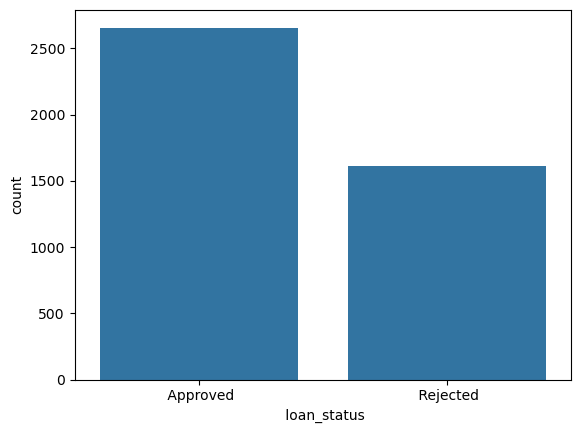

In [42]:
sns.countplot(data=df, x=' loan_status')

<Axes: xlabel=' education', ylabel='count'>

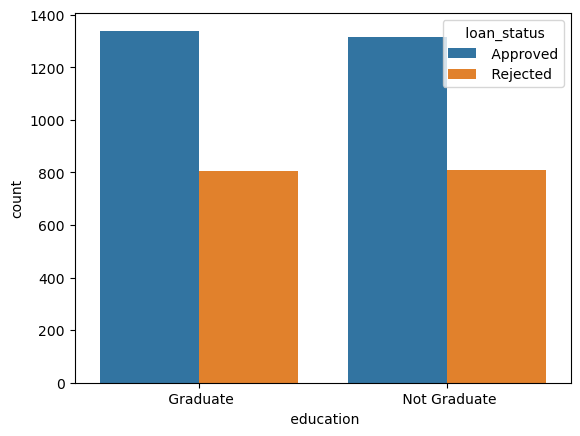

In [43]:
sns.countplot(df, x = ' education', hue= ' loan_status')

<Axes: xlabel=' self_employed', ylabel='count'>

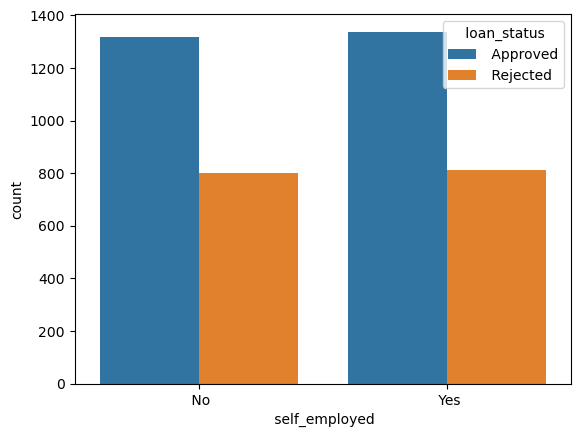

In [44]:
sns.countplot(df, x = ' self_employed', hue= ' loan_status')

In [45]:
df[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [46]:
df['education'] = df[' education'].map({' Graduate':1, ' Not Graduate':0})

In [47]:
df['self_employed'] = df[' self_employed'].map({' Yes':1, ' No':0})

In [48]:
df['loan_status'] = df[' loan_status'].map({' Approved':1, ' Rejected':0})

In [49]:
df.drop(columns=[' education', ' self_employed',' loan_status'],inplace=True)

In [53]:
df.drop(columns=['loan_id'],inplace=True)

In [54]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0


In [55]:
# Correlation

In [56]:
df.corr()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status
no_of_dependents,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,0.002697,0.000765,-0.018114
income_annum,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,0.011625,0.002368,-0.015189
loan_amount,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,0.010631,0.001450,0.016150
loan_term,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,-0.008417,0.004107,-0.113036
cibil_score,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.004649,-0.004866,0.770518
residential_assets_value,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,0.010930,0.006144,-0.014367
commercial_assets_value,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.006763,-0.017998,0.008246
luxury_assets_value,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,0.012471,0.004413,-0.015465
bank_asset_value,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000,0.009424,-0.000215,-0.006778
education,0.002697,0.011625,0.010631,-0.008417,-0.004649,0.010930,-0.006763,0.012471,0.009424,1.000000,-0.023224,0.004918


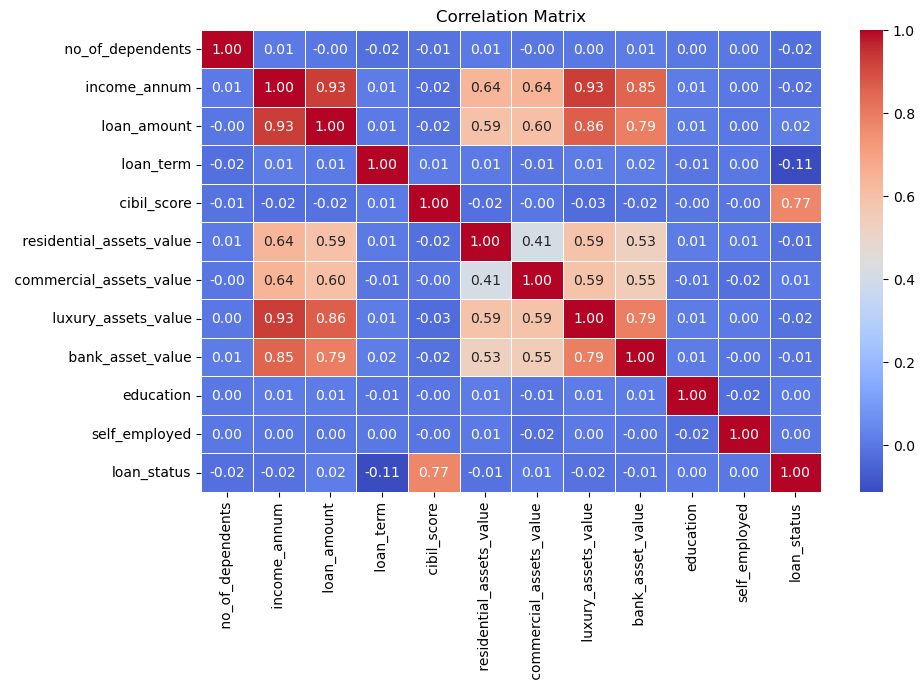

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt = '.2f', cmap= 'coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [58]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [60]:
scaler = StandardScaler()

In [61]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building

In [64]:
model = LogisticRegression()

In [65]:
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [66]:
y_pred = model.predict(X_test_scaled)

In [69]:
accuracy = accuracy_score(y_test,y_pred)

In [70]:
accuracy

0.905152224824356